<center>
    <img src="../../../../img/Iterations_vs_Je_Analysis.png" alt="Drawing" style="width: 100%;height: 100%"/>
</center>

<center>
    <img src="../../../../img/Iterations_vs_Je_Analysis_2.png" alt="Drawing" style="width: 100%;height: 100%"/>
</center>

<h1 align="center" style="color:red"> 
    <b>
        Manual Selecting the Learning Rate
    </b>
</h1>

In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

### Defining the functions

In [3]:
def calculateErrorSurface(y, x1, x2):
    '''Generate data points for plotting the error surface.'''

    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-20.0, 24.0, M)
    a2 = np.linspace(-20.0, 24.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y - yhat))           
            
    return J, A1, A2

# Implementação do gradiente descendente em batelada.
def gradientDescent(X, y_noisy, maxEpochs, N, tol=0.001):
    '''Function implementing the batch version of the gradient descent.'''
    
    # Create empty structures.
    a_hist = np.zeros((2, maxEpochs))
    Jgd = np.zeros(maxEpochs)
    a_aux = np.zeros((2,1))

    # Intialize the weights.
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Intialize weights history.
    a_hist[:, 0] = a.reshape(2,)

    # Calculate the error for the initial weights.
    yhat = X.dot(a)
    Jgd[0] = (1.0/N)*np.sum(np.power(y_noisy - yhat, 2))

    error = 1
    iteration = 0
    while(error > tol and iteration < maxEpochs-1):

        # Hypothesis function.
        h = X.dot(a)

        # Calculate gradient vector.
        gradients = -(2.0/N)*X.T.dot(y_noisy - h)

        # Weight update rule.
        a = a - alpha*gradients

        # Store weight variation.
        a_hist[:, iteration+1] = a.reshape(2,)

        # Calculate and store actual error.
        yhat = X.dot(a)
        Jgd[iteration+1] = (1.0/N)*sum(np.power(y_noisy - yhat, 2))    

        # Error difference between actual and previous iteration.
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])   

        iteration = iteration + 1
        
    return a, Jgd, a_hist, iteration

### Generating the observable function.

The objective function is given by
$$y = a_1 x_1 + a_2 x_2,$$
where $a_1$ e $a_2$ are equal to 1 and $x_1$ and $x_2$ are values ​​taken from the Standard Normal Gaussian distribution.


The observable function is given by
$$y_{noisy} = y + w,$$
where $w$ is the noise added to the samples and follows the Standard Normal Gaussian distribution.


The hypothesis function that will be used is given by
$$h(x) = \hat{a}_1 x_1 + \hat{a}_2 x_2$$

In [4]:
# Number of pairs feature/label.
N = 10000

# Input values (features)
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Noise vector
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

### Plotting the observable function.

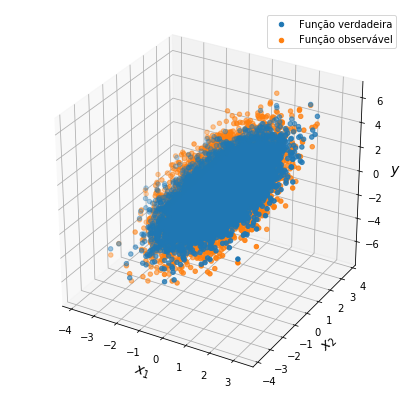

In [5]:
# Plot observable function.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()

ax.scatter(x1,x2,y, label='Função verdadeira')
ax.scatter(x1,x2,y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
plt.legend()
plt.show()

### Closed form solution

In [10]:
# Concatenate both column vectors, x1 and x2.
X = np.block([x1,x2])

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Print a1 and a2 weights.
print('peso a1:', a_opt[0])
print('peso a2:', a_opt[1])

# Perform prediction.
yhat = X.dot(a_opt)

# Calculate the mean squared error.
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Plot the MSE.
print('Erro:', Joptimum)

peso a1: [1.00329941]
peso a2: [0.9999705]
Erro: 0.995225680139118


### Plotting the error surface.

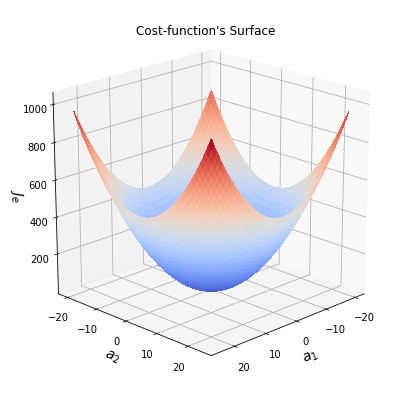

In [7]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#plt.savefig("superficie_de_erro_ajuste_passo_de_aprendizagem.png", dpi=600)
# Show the plot.
plt.show()

### Gradient Descent Solution

In [14]:
# Maximum number of epochs.
maxEpochs = 10000

# Learning rate.
alpha = 0.5

#alpha = 0.01 # Too small learning rate.
#alpha = 0.9 # Large learning rate, but it converges.
#alpha = 1.1 # Too large learning rate (divergence).
#alpha = 0.5 # Empirically found optimum learning rate.

# Gradient-descent solution.
a, Jgd, a_hist, iteration = gradientDescent(X, y_noisy, maxEpochs, N)

### Plotting the contour surface and MSE as a function of iterations.

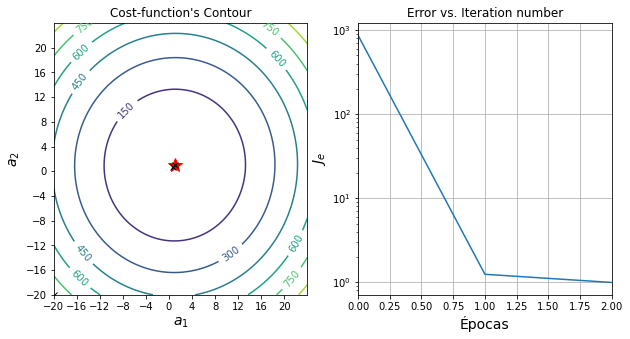

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

cp = ax1.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Cost-function\'s Contour')
ax1.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
ax1.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
ax1.set_xticks(np.arange(-20, 24, step=4.0))
ax1.set_yticks(np.arange(-20, 24, step=4.0))

ax2.plot(np.arange(0, iteration), Jgd[0:iteration])
ax2.set_xlim((0, iteration))
ax2.set_yscale('log')
ax2.set_xlabel('Épocas', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Error vs. Iteration number')
ax2.set_xlim(0, iteration-1)
ax2.grid()

plt.show()

**Conclusions**

+ Large steps make the algorithm go back and forth across the surface, luckily, if the gradient decay rate is large, multiplication with the learning step causes the algorithm to converge.
+ Very large steps cause the algorithm to diverge (positive feedback and consequent overflow of numerical precision).
+ Very small steps result in a long training process, and the algorithm may, for example, never reach a minimum for a small number of epochs.
+ However, a small step is better than a very large one, because given we wait long enough, the algorithm will converge.

+ **Step value must be explored**.